In [13]:
from resonance.linear_systems import SingleDoFLinearSystem
import numpy as np
msd_sys = SingleDoFLinearSystem()

k = 8000.0 #N/m
m = 2000.0 #kg
x0 = 0.5 #m
v0 = -10.0 #m/s

# Circular natural frequency
wn = (k/m)**(1/2)

# Amplitude
Amplitude = (x0**2+(v0/wn)**2)**(1/2)
MaxVelocity = wn*Amplitude
MaxAcceleration = wn**2*Amplitude

msd_sys.constants['m'] = m  # kg
msd_sys.constants['fn'] = wn/(2*np.pi)  # Hz
msd_sys.constants['zeta'] = 0.0  # unitless

msd_sys.constants
msd_sys.coordinates['x'] = x0  # m
msd_sys.speeds['v'] = v0  # m/s

def calculate_canonical_coefficients(m, fn, zeta):
    """Returns the system's mass, damping, and stiffness coefficients given
    the system's constants."""
    wn = 2*np.pi*fn
    k = m*wn**2
    c = zeta*2*wn*m
    return m, c, k

msd_sys.canonical_coeffs_func = calculate_canonical_coefficients
print("Circular natural frequency wn is = %0.4f rad/s" % (k/m)**(1/2))
print("Period Tn is = %0.4f secs" % msd_sys.period())
print("Natural frequency fn is = %0.4f Hz" % msd_sys.constants['fn'])
print("Amplitude = %0.4f m" % Amplitude)
print("Max Velocity = %0.4f m/s" % MaxVelocity)
print("Max Acceleration = %0.4f m/s^2" % MaxAcceleration)

Circular natural frequency wn is = 2.0000 rad/s
Period Tn is = 3.1416 secs
Natural frequency fn is = 0.3183 Hz
Amplitude = 5.0249 m
Max Velocity = 10.0499 m/s
Max Acceleration = 20.0998 m/s^2


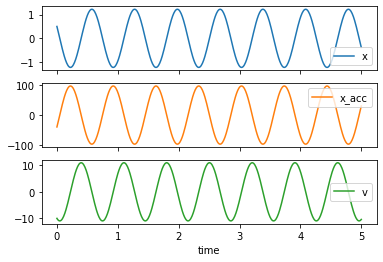

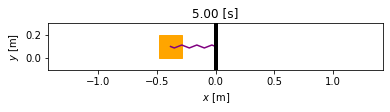

In [12]:
import matplotlib.pyplot as plt
from resonance.functions import spring
from IPython.display import HTML

# create a new constant to describe the block's dimension, l
msd_sys.constants['l'] = 0.2  # m

def create_configuration_figure(x, l):

    # create a figure with one or more axes
    fig, ax = plt.subplots()

    # the `spring()` function creates the x and y data for plotting a simple
    # spring
    spring_x_data, spring_y_data = spring(0.0, x, l/2, l/2, l/8, n=9)
    lines = ax.plot(spring_x_data, spring_y_data, color='purple')
    spring_line = lines[0]

    # add a square that represents the mass
    square = plt.Rectangle((x-0.0, 0.0), width=l, height=l, color='orange')
    ax.add_patch(square)

    # add a vertical line representing the spring's attachment point
    ax.axvline(0.0, linewidth=4.0, color='black')

    # set axis limits and aspect ratio such that the entire motion will appear
    ax.set_ylim((-l/2, 3*l/2))
    ax.set_xlim((-np.abs((x**2+(v0/wn)**2)**0.5) - l, np.abs((x**2+(v0/wn)**2)**0.5) + l))
    ax.set_aspect('equal')

    ax.set_xlabel('$x$ [m]')
    ax.set_ylabel('$y$ [m]')

    # this function must return the figure as the first item
    # but you also may return any number of objects that you'd like to have
    # access to modify, e.g. for an animation update

    return fig, ax, spring_line, square

# associate the function with the system
msd_sys.config_plot_func = create_configuration_figure
#fig, ax, spring_line, square = msd_sys.plot_configuration()

def update_configuration(x, l, time,  # any variables you need for updating
                         ax, spring_line, square):  # returned items from plot_configuration() in same order

    ax.set_title('{:1.2f} [s]'.format(time))

    xs, ys = spring(0.0, x, l/2, l/2, l/8, n=3)
    spring_line.set_data(xs, ys)

    square.set_xy((x-0.1, 0.0))

    
trajectories = msd_sys.free_response(5.0)
axes = trajectories.plot(subplots=True)
msd_sys.config_plot_update_func = update_configuration
animation = msd_sys.animate_configuration(fps=30)
HTML(animation.to_jshtml(fps=30))